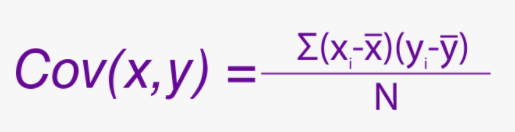

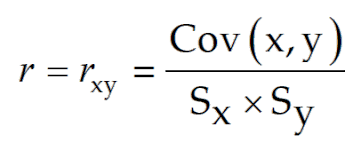

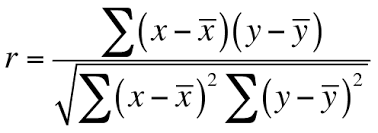

# Book recommendation system using Corelation

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books=pd.read_csv('BX-Books.csv',sep=';',error_bad_lines=False,encoding='latin-1')
books.columns=['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher','imageUrlS','imageUrlM','imageUrlL']
users=pd.read_csv('BX-Users.csv',sep=';',error_bad_lines=False,encoding='latin-1')
users.columns=['userID','Location','Age']
ratings=pd.read_csv('BX-Book-Ratings.csv',sep=';',error_bad_lines=False,encoding='latin-1')
ratings.columns=['userID','ISBN','bookRating']
import warnings
warnings.filterwarnings("ignore")

#error_bad_lines=False. #Lines with too many fields will by default cause an exception to be raised and no dataframe will be returned.
#If false then the bad lines will be dropped from the dataframe that is returned.

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [19]:
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [20]:
users

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [21]:
ratings

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


(array([716109.,   1770.,   2759.,   5996.,   8904.,  50974.,  36924.,
         76457., 103736., 146151.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

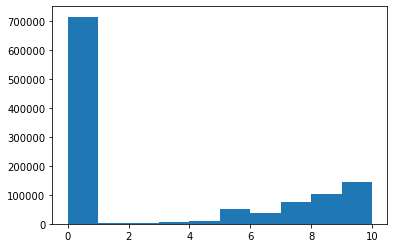

In [22]:
plt.hist(ratings['bookRating'])

(array([9.2660e+03, 7.6460e+04, 5.1904e+04, 2.6379e+04, 3.5470e+03,
        1.6100e+02, 2.8600e+02, 3.0000e+01, 1.3000e+01, 1.4000e+01,
        3.0000e+00, 3.0000e+00, 1.6000e+01, 5.0000e+00, 9.0000e+00]),
 array([  0.        ,  16.26666667,  32.53333333,  48.8       ,
         65.06666667,  81.33333333,  97.6       , 113.86666667,
        130.13333333, 146.4       , 162.66666667, 178.93333333,
        195.2       , 211.46666667, 227.73333333, 244.        ]),
 <BarContainer object of 15 artists>)

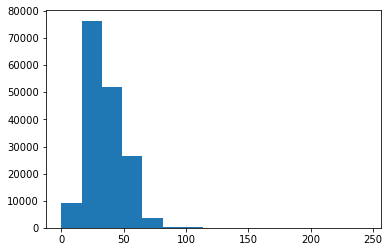

In [23]:
plt.hist(users['Age'],bins=15)

# Recommendation based on rating counts

In [24]:
rating_count=pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count().sort_values(ascending=False))
rating_count

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
...,...
0801064090,1
0801064252,1
0801064279,1


In [25]:
most_rated_books_index=rating_count.head()
most_rated_books_index

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [26]:
most_rated_books_summary=pd.merge(most_rated_books_index,books,on='ISBN')
most_rated_books_summary

,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,2502,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,1295,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,883,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,732,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,723,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


# Recommendations based on corelations

We will use Pearsons R corelation to measure the linear corelation between two variables, in our case, the ratings for two books. First we need to find out the average rating, and the number of ratings each book received.

In [27]:
rating_count = rating_count.rename(columns={'bookRating': 'ratingCount'})
rating_count

,ratingCount
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
...,...
0801064090,1
0801064252,1
0801064279,1


In [28]:
book_rating_avj=pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
book_rating_avj

,bookRating
ISBN,
0330299891,3.0
0375404120,1.5
0586045007,0.0
9022906116,3.5
9032803328,0.0
...,...
cn113107,0.0
ooo7156103,7.0
§423350229,0.0


In [29]:
average_rating=pd.merge(rating_count,book_rating_avj,on='ISBN')
average_rating

,ratingCount,bookRating
ISBN,,
0971880107,2502,1.019584
0316666343,1295,4.468726
0385504209,883,4.652322
0060928336,732,3.448087
0312195516,723,4.334716
...,...,...
0801064090,1,0.000000
0801064252,1,5.000000
0801064279,1,0.000000


# To ensure statistical significance, users with less than 200 ratings and books with less than 100 ratings are excluded

In [30]:
ratings

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [35]:
counts1=ratings['userID'].value_counts() #gives the number of ratings each usedID has given
ratings=ratings[ratings['userID'].isin(counts1[counts1>=200].index)]
counts=ratings['bookRating'].value_counts()
ratings=ratings[ratings['bookRating'].isin(counts[counts>=100].index)]

In [36]:
ratings

,userID,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


In [38]:
ratings_pivot=ratings.pivot(index='userID',columns='ISBN').bookRating
ratings_pivot

ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
bones_ratings=ratings_pivot['0316666343'] #just finding out the rating given by users to a random book.
bones_ratings
# just finding out the ratings data present in a particular column.

userID
254       NaN
2276      NaN
2766      9.0
2977      NaN
3363      0.0
         ... 
275970    NaN
277427    0.0
277478    NaN
277639    NaN
278418    NaN
Name: 0316666343, Length: 905, dtype: float64

In [42]:
similar_to_bones=ratings_pivot.corrwith(bones_ratings) #finding the corelation with all columns(books)
similar_to_bones

ISBN
 0330299891      NaN
 0375404120      NaN
 0586045007      NaN
 9022906116      NaN
 9032803328      NaN
                  ..
\2842053052\""   NaN
b00005wz75       NaN
cn108465         NaN
cn113107         NaN
Ô½crosoft        NaN
Length: 207699, dtype: float64

In [44]:
corr_bones=pd.DataFrame(similar_to_bones,columns=['pearsonR'])
corr_bones

,pearsonR
ISBN,
0330299891,NaN
0375404120,NaN
0586045007,NaN
9022906116,NaN
9032803328,NaN
...,...
"\2842053052\""""",NaN
b00005wz75,NaN
cn108465,NaN


In [46]:
corr_bones.dropna(inplace=True)
corr_bones

,pearsonR
ISBN,
0002005018,9.614813e-18
0002184974,1.000000e+00
0002250810,1.000000e+00
000225929X,1.000000e+00
0006127754,-1.000000e+00
...,...
9728605161,4.096440e-01
B00005W8DZ,1.000000e+00
B00009EF82,1.000000e+00


In [47]:
corr_summary=corr_bones.join(average_rating['ratingCount'])
corr_summary

,pearsonR,ratingCount
ISBN,,
0002005018,9.614813e-18,14
0002184974,1.000000e+00,2
0002250810,1.000000e+00,3
000225929X,1.000000e+00,4
0006127754,-1.000000e+00,5
...,...,...
9728605161,4.096440e-01,9
B00005W8DZ,1.000000e+00,4
B00009EF82,1.000000e+00,10


In [51]:
corr_summary=corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR',ascending=False).head(10)
corr_summary

,pearsonR,ratingCount
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


In [53]:
corr_summary=pd.merge(corr_summary,books,on='ISBN')
corr_summary

,ISBN,pearsonR,ratingCount,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0316666343,1.000000,1295,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0312291639,0.471872,354,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
2,0316601950,0.434248,568,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...
3,0446610038,0.429712,391,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
4,0446672211,0.421478,585,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
5,0385265700,0.351635,319,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...
6,0345342968,0.316922,321,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
7,0060930535,0.309860,494,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
8,0375707972,0.308145,354,The Reader,Bernhard Schlink,1999,Vintage Books USA,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...
9,0684872153,0.272480,326,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...
